In [54]:
import pandas as pd
file = pd.read_csv("/content/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")
file.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


# Data cleaning
we need to change:

medium high lows ---> 1 2 0

yes no           ---> 1 0

profession --> one hot encoding     

sleep, age, bmi --> normalize

weight, height ---> drop it we already have bmi

and remove nan values

make train test split

  - random shuffle
  - split

In [55]:
file.info() #we got lucky no null here
file.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [56]:
file["exercise"].unique()

array(['low', 'high', 'medium', 'none'], dtype=object)

In [57]:
file.replace({'yes': 0, 'no': 1}, inplace=True)
file.replace({'low': 0, 'medium': 0.5, 'high': 1}, inplace=True)
file.replace({'high': 1, 'low': 0,'none':-1}, inplace=True)

/tmp/ipython-input-1328979411.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  file.replace({'yes': 0, 'no': 1}, inplace=True)
/tmp/ipython-input-1328979411.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  file.replace({'low': 0, 'medium': 0.5, 'high': 1}, inplace=True)
/tmp/ipython-input-1328979411.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `

In [58]:
file.drop("weight",inplace=True,axis=1)
file.drop("height",inplace=True,axis =1)

In [59]:
file.head()

,age,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,0.0,6.1,0.5,0,0,0,office_worker,17.6,1
1,69,1.0,6.9,1.0,1,1,1,teacher,26.3,1
2,46,1.0,6.6,0.0,0,1,1,artist,45.3,1
3,32,0.5,8.5,0.5,1,1,1,artist,15.6,0
4,60,1.0,8.0,0.0,1,1,0,teacher,25.8,1


In [60]:
def normalize(column,df):
  x_max, x_min = max(df[column]), min(df[column])
  df[column] = (df[column] - x_min) / (x_max - x_min)

In [61]:
normalize("sleep",file)
normalize("bmi",file)
normalize("age",file)

In [62]:
file.head()

,age,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,0.622951,0.0,0.442857,0.5,0,0,0,office_worker,0.1550,1
1,0.836066,1.0,0.557143,1.0,1,1,1,teacher,0.3725,1
2,0.459016,1.0,0.514286,0.0,0,1,1,artist,0.8475,1
3,0.229508,0.5,0.785714,0.5,1,1,1,artist,0.1050,0
4,0.688525,1.0,0.714286,0.0,1,1,0,teacher,0.3600,1


In [63]:
def train_test_split(seed,fraction,df):
  df = df.sample(frac=1, random_state=seed).reset_index(drop=True)
  split = int(fraction * len(df))
  train_df = df[:split]
  test_df = df[split:].reset_index(drop=True)
  return [train_df,test_df]

In [64]:
train_df, test_df = train_test_split(69,0.85,file)

In [65]:
X_train, y_train = train_df.drop("health_risk",axis=1),train_df["health_risk"]
X_test, y_test = test_df.drop("health_risk",axis=1),test_df["health_risk"]
X_test

,age,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
0,0.672131,0.5,0.671429,0.0,1,0,0,doctor,0.3725
1,0.000000,-1.0,0.628571,1.0,1,0,1,engineer,0.3625
2,0.344262,-1.0,0.628571,0.0,0,1,1,office_worker,0.2650
3,0.803279,0.0,0.385714,0.5,0,1,1,teacher,0.4100
4,0.836066,0.5,0.614286,0.5,1,1,0,driver,0.7000
...,...,...,...,...,...,...,...,...,...
745,0.491803,0.5,0.357143,0.5,1,1,0,doctor,0.1925
746,0.819672,1.0,0.257143,0.0,1,0,0,engineer,0.3325
747,0.311475,0.5,1.000000,1.0,1,1,1,engineer,0.6775
748,0.901639,0.0,0.985714,0.5,1,1,0,teacher,0.0925


In [66]:
file["profession"].unique()

array(['office_worker', 'teacher', 'artist', 'farmer', 'driver',
       'engineer', 'student', 'doctor'], dtype=object)

In [67]:
def one_hot_encode(column,df):
  categories = df[column].unique()
  for category in categories:
    df[category] = (df[column] == category).astype(int)
  df.drop(column,axis=1,inplace=True)

one_hot_encode("profession",X_train)
one_hot_encode("profession",X_test)

In [68]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [69]:
X_train

,age,exercise,sleep,sugar_intake,smoking,alcohol,married,bmi,engineer,doctor,artist,farmer,teacher,driver,student,office_worker
0,0.114754,0.5,0.485714,1.0,1,1,1,0.5950,1,0,0,0,0,0,0,0
1,0.016393,1.0,0.842857,0.5,0,1,0,0.4400,0,1,0,0,0,0,0,0
2,0.327869,-1.0,0.714286,0.5,0,0,0,0.4950,0,0,1,0,0,0,0,0
3,0.655738,0.5,0.042857,0.0,1,1,0,0.2475,0,0,0,1,0,0,0,0
4,0.524590,0.5,0.942857,0.0,0,1,0,0.4375,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0.967213,0.0,0.542857,0.5,1,1,0,0.9750,0,0,0,1,0,0,0,0
4246,0.459016,1.0,0.642857,0.0,1,0,1,0.4250,0,0,0,0,0,0,0,1
4247,0.622951,0.5,0.328571,0.0,1,1,1,0.6450,0,0,0,0,0,0,1,0
4248,0.885246,0.5,0.571429,0.0,1,1,0,0.6850,0,0,0,0,0,0,1,0


In [70]:
import numpy as np

X_train, X_test = X_train.to_numpy(), X_test.to_numpy()

#for explicit shaping to avoid weird numpy stuff
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [93]:
#weights and bias
w = np.zeros((X_train.shape[1], 1))
b = 0.0

# For logistic Regression

Binary cross-entropy loss:

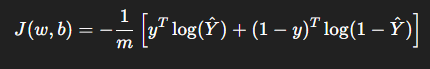

dj/dw:

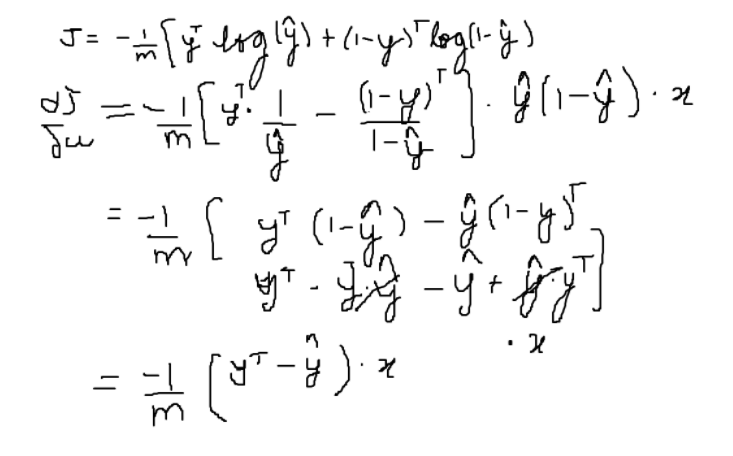

dj/db:

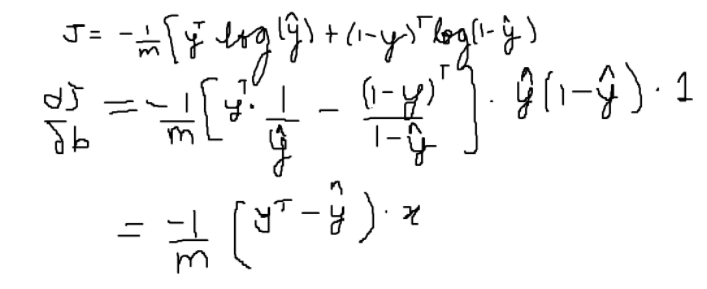

In [72]:
def r2_score(y_hat, y):
    ss_res = np.sum((y - y_hat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - (ss_res / ss_tot)
def rmse(y_hat, y):
    return np.sqrt(np.mean((y_hat - y)**2))

In [94]:
def train(epoch,learning_rate,X,y,w,b):
  m = y.shape[0]
  rmse_list = []
  r2_list = []
  for i in range(epoch):
    z = np.dot(X,w) + b
    y_hat = sigmoid(z)

    dw = (1/m)*np.dot(X.T,(y_hat-y))
    db = (1/m)*np.sum(y_hat-y)
    w  -= learning_rate*dw
    b  -= learning_rate*db

    RMSE = rmse(y_hat,y)
    r2 = r2_score(y_hat,y)
    r2_list.append(r2)
    rmse_list.append(RMSE)

    epoch_alias = int(epoch/10)
    if i%epoch_alias == 0:
      RMSE = np.sqrt(np.mean((y_hat-y)**2))
      print(f"Epoch {i}:\n RMSE : {RMSE} R2_score : {r2}")
  return w, b, rmse_list, r2_list

w, b , rmse_list, r2_list = train(350000,0.001,X_train,y_train,w,b)

Epoch 0:
 RMSE : 0.5 R2_score : -0.1795120343204859
Epoch 35000:
 RMSE : 0.37807931421540986 R2_score : 0.3255834788081464
Epoch 70000:
 RMSE : 0.35043755277602595 R2_score : 0.42059312335924826
Epoch 105000:
 RMSE : 0.33647283186449506 R2_score : 0.4658510558491883
Epoch 140000:
 RMSE : 0.3279779572823612 R2_score : 0.4924817299897476
Epoch 175000:
 RMSE : 0.32227323389865065 R2_score : 0.5099833445377039
Epoch 210000:
 RMSE : 0.3182090360270297 R2_score : 0.5222646440692457
Epoch 245000:
 RMSE : 0.3151984941724151 R2_score : 0.5312614894993348
Epoch 280000:
 RMSE : 0.3129053411279284 R2_score : 0.5380570745655131
Epoch 315000:
 RMSE : 0.3111210966180784 R2_score : 0.5433102236498235


In [74]:
def test(X,w,b):
  z = np.dot(X,w) + b
  y_hat = sigmoid(z)
  return y_hat

In [95]:
y_predicted = test(X_test,w,b)
print(f"RMSE on test: {rmse(y_predicted,y_test)}\nR2 on test: {r2_score(y_predicted,y_test)}")

RMSE on test: 0.3081878844901124
R2 on test: 0.5342261661982048


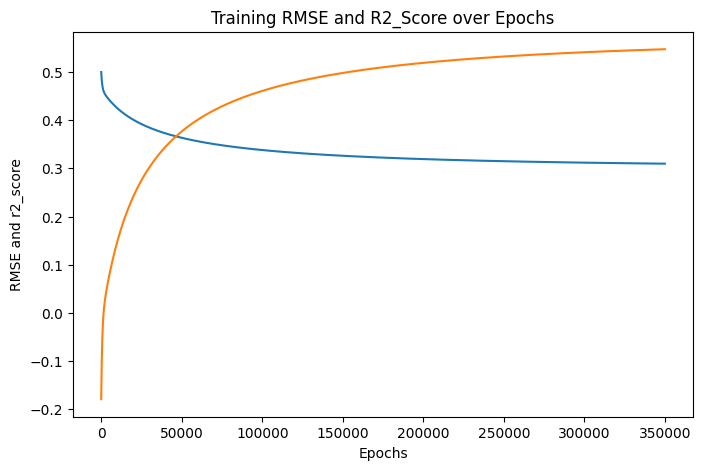

In [96]:
# straight from chatgpt
import matplotlib.pyplot as plt
# 1. RMSE over training epochs
plt.figure(figsize=(8,5))
plt.plot(rmse_list)
plt.plot(r2_list)
plt.title("Training RMSE and R2_Score over Epochs")
plt.xlabel("Epochs")
plt.ylabel("RMSE and r2_score")
plt.show()

In [97]:
correct = 0
for i, j in zip(y_predicted, y_test):
  if i > 0.5:
    i = 1
  else:
    i = 0
  if i == j:
    correct += 1
print(f"Acc: {(correct/y_predicted.shape[0])*100:.2f}%")

Acc: 86.53%


In [98]:
# Testing against scikit learn
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [99]:
y_pred = model.predict(X_test)

In [100]:
#from data models are practically the same so we might infer that our model is optimal and data is centered
correct = 0
for i, j in zip(y_pred, y_test):
  if i > 0.5:
    i = 1
  else:
    i = 0
  if i == j:
    correct += 1
print(f"Acc: {(correct/y_pred.shape[0])*100:.2f}%")

Acc: 86.00%
